In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
import time
%matplotlib notebook

In [2]:
npd.ppms_init('lockin1', 'k2200', 'lockin2')

Note this uses mT units for getting and setting fields with field() and field_set_stable(). Just divide Oe by 10 to get mT
Connected to: Stanford_Research_Systems SR830 (serial:s/n35235, firmware:ver1.07) in 0.48s
Connected to: Keithley Instruments 2200-72-1 (serial:9200719, firmware:1.28-1.26) in 0.03s
Connected to: Stanford_Research_Systems SR810 (serial:s/n21019, firmware:ver1.01) in 0.05s


In [3]:
lockin1.X()

4.61939e-06

In [9]:
lockin2.sensitivity(0.002)

In [3]:
k2200.voltage()

0.0

In [4]:
k2200.voltage.step = 0.08
k2200.voltage.inter_delay = 0.1

In [12]:
k2200.voltage(1)

In [6]:
k2200.voltage(0)

In [4]:
k2200.output(1)

Measuring 10-9, current in 11 (1 Gohm resistor, 1V), contact 6 grounded. The gate is set to negative voltages

In [10]:
lockin1.X()/1e-9

64105.3

In [16]:
print(lockin1.X(), lockin1.Y())

7.10343e-05 -0.000122898


Try next contacts since Y is so large. 8-7

In [4]:
print(lockin1.X(), lockin1.Y())  # better

1.09152e-05 -1.86265e-07


In [6]:
gvals = np.linspace(0, 15, 101)
data1, plot1 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts8-7_negative_gate')

Started at 2019-09-29 21:42:59
DataSet:
   location = 'data/2019-09-29/#001_2K_Contacts8-7_negative_gate_21-42-55'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 21:44:58


In [7]:
k2200.voltage(0)

Try 3-4

In [10]:
k2200.voltage(0)

Try 14-3

In [ ]:
the current sourcing contacts  could be an issue too. Yeah, I'll try to switch them. Right now nothing is working

Trying to source current 12-4, measuring 8-7

In [11]:
gvals = np.linspace(0, 15, 101)
data2, plot2 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts8-7_negative_gate')

Started at 2019-09-29 21:54:04
DataSet:
   location = 'data/2019-09-29/#002_2K_Contacts8-7_negative_gate_21-54-03'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 21:56:03


In [24]:
k2200.voltage(0)

I think contacts 9, 14, 6 don't work. Use 10-4 for source, drain. Measure 13-3

In [13]:
gvals = np.linspace(0, 15, 101)
data3, plot3 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts13-3_negative_gate')

Started at 2019-09-29 22:04:53
DataSet:
   location = 'data/2019-09-29/#003_2K_Contacts13-3_negative_gate_22-04-52'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:06:52


Same source/drain, but use 12-13

In [14]:
gvals = np.linspace(15, 0, 101)
data4, plot4 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts12-13_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:10:43
DataSet:
   location = 'data/2019-09-29/#004_2K_Contacts12-13_negative_gate_22-10-42'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:12:42


In [15]:
gvals = np.linspace(0, 15, 101)
data5, plot5 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts8-7_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:15:10
DataSet:
   location = 'data/2019-09-29/#005_2K_Contacts8-7_negative_gate_22-15-09'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:17:09


In [16]:
# Source 11-4, measure 13-3
gvals = np.linspace(0, 15, 101)
data6, plot6 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts13-3_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:18:40
DataSet:
   location = 'data/2019-09-29/#006_2K_Contacts13-3_negative_gate_22-18-40'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:20:39


In [17]:
gvals = np.linspace(0, 15, 101)
data7, plot7 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts10-3_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:23:36
DataSet:
   location = 'data/2019-09-29/#007_2K_Contacts10-3_negative_gate_22-23-35'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:25:35


In [18]:
gvals = np.linspace(0, 15, 101)
data8, plot8 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts10-7_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:27:40
DataSet:
   location = 'data/2019-09-29/#008_2K_Contacts10-7_negative_gate_22-27-39'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:29:39


In [19]:
gvals = np.linspace(0, 15, 101)  # oops, 10-8 instead of 10-7
data8, plot8 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts10-7_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:30:45
DataSet:
   location = 'data/2019-09-29/#009_2K_Contacts10-8_negative_gate_22-30-45'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:32:44


In [20]:
gvals = np.linspace(0, 15, 101)
data10, plot10 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts10-9_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:34:55
DataSet:
   location = 'data/2019-09-29/#010_2K_Contacts10-9_negative_gate_22-34-54'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:36:53


In [21]:
gvals = np.linspace(0, 15, 101)
data11, plot11 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts10-13_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:37:54
DataSet:
   location = 'data/2019-09-29/#011_2K_Contacts10-13_negative_gate_22-37-54'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:39:53


In [22]:
gvals = np.linspace(0, 15, 101)
data12, plot12 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts10-14_negative_gate')
k2200.voltage(0)

Started at 2019-09-29 22:40:47
DataSet:
   location = 'data/2019-09-29/#012_2K_Contacts10-14_negative_gate_22-40-46'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-29 22:42:46


In [25]:
gvals = np.linspace(0, 15, 101)
data0, plot0 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='290K_Contacts4-3_positive_gate')
k2200.voltage(0)

Started at 2019-09-30 11:29:59
DataSet:
   location = 'data/2019-09-30/#001_290K_Contacts4-3_positive_gate_11-29-58'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-30 11:32:01


Maybe 13 is bad too, but it works fine when used to measure 13-3... However, 9 seems to work in the 4-pt setup. Try 10-14

In [ ]:
you should just go home dude, we'll figure ut out in the morning. Ok, I don't get what's happening. lol me neither. I'll just try one more on the other side of the devicecool. Contacts 3, 4 seem to be working really well. Contacts 10, 11 are also pretty good. Then contacts 12, 13, 8, 7 seem marginal..  I looked by doing a current measurement an d gotcha

Started at 2019-09-30 12:16:48
DataSet:
   location = 'data/2019-09-30/#002_2K_Contacts4-3_positive_gate_12-16-47'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-30 12:18:47


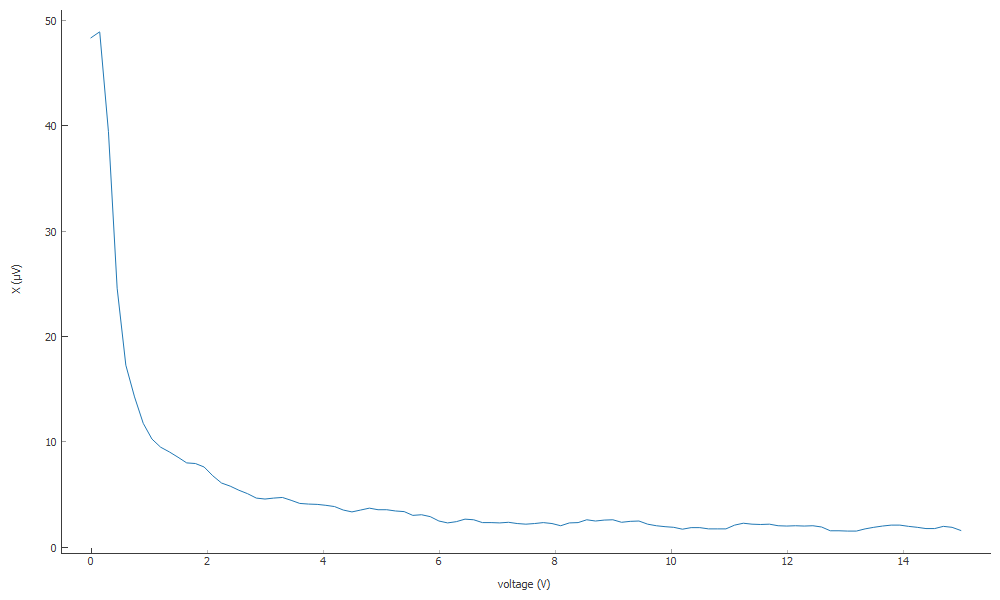

In [28]:
gvals = np.linspace(0, 15, 101)
data1, plot1 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts4-3_positive_gate')
k2200.voltage(0)
plot1[0]

Started at 2019-09-30 12:20:19
DataSet:
   location = 'data/2019-09-30/#003_2K_Contacts14-13_positive_gate_12-20-17'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
Finished at 2019-09-30 12:22:21


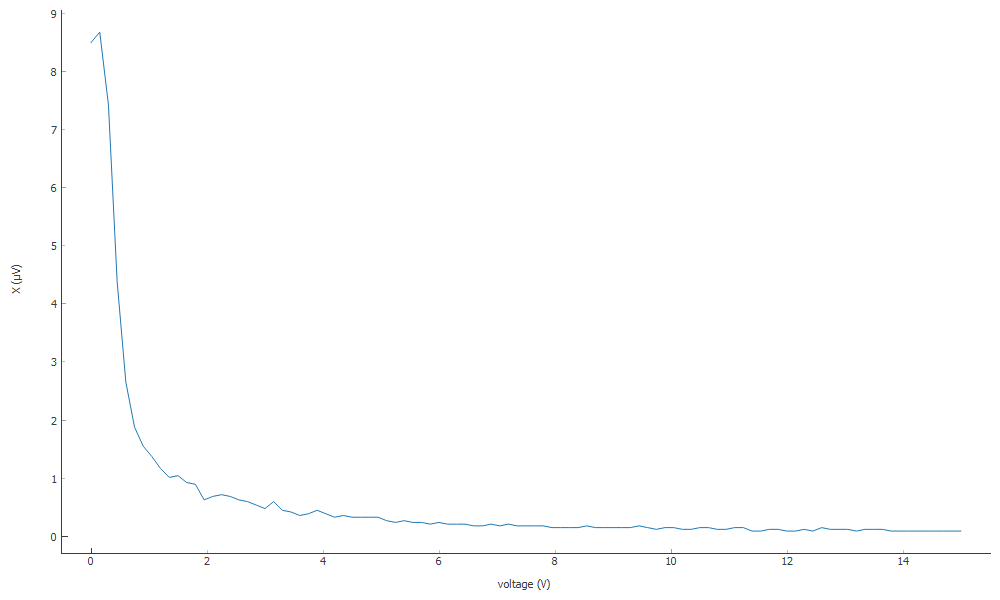

In [29]:
gvals = np.linspace(0, 15, 101)
data2, plot2 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts14-13_positive_gate')
k2200.voltage(0)
plot2[0]

Started at 2019-09-30 12:23:34
DataSet:
   location = 'data/2019-09-30/#004_2K_Contacts14-13_positive_gate_12-23-34'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (81,)
   Measured | lockin1_X         | X            | (81,)
   Measured | lockin1_Y         | Y            | (81,)
Finished at 2019-09-30 12:25:26


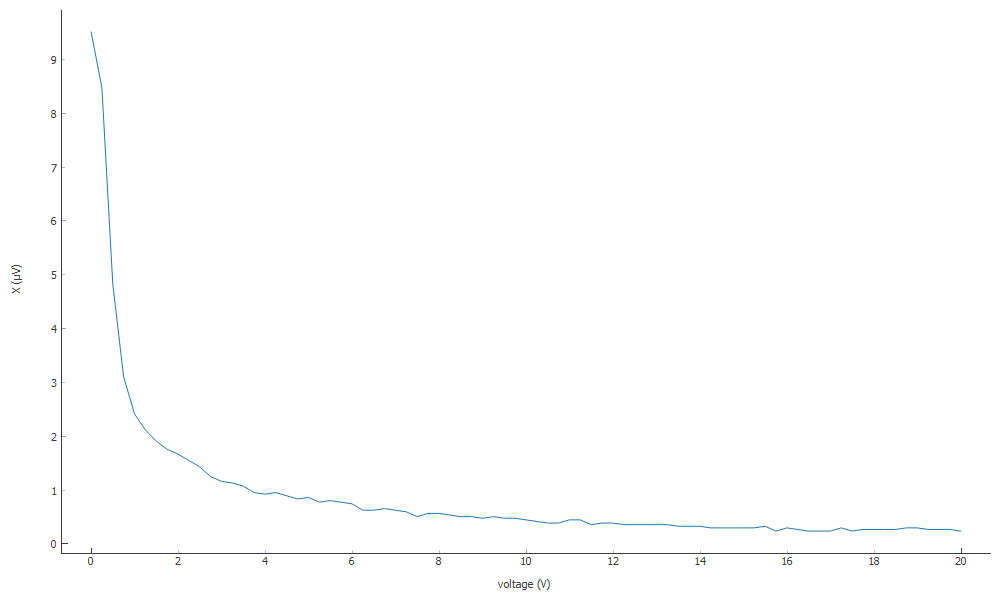

In [30]:
gvals = np.linspace(0, 20, 81)
data3, plot3 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts14-13_positive_gate')
k2200.voltage(0)
plot3[0]

Started at 2019-09-30 12:27:01
DataSet:
   location = 'data/2019-09-30/#005_2K_Contacts9-10_positive_gate_12-26-59'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (51,)
   Measured | lockin1_X         | X            | (51,)
   Measured | lockin1_Y         | Y            | (51,)
Finished at 2019-09-30 12:28:27


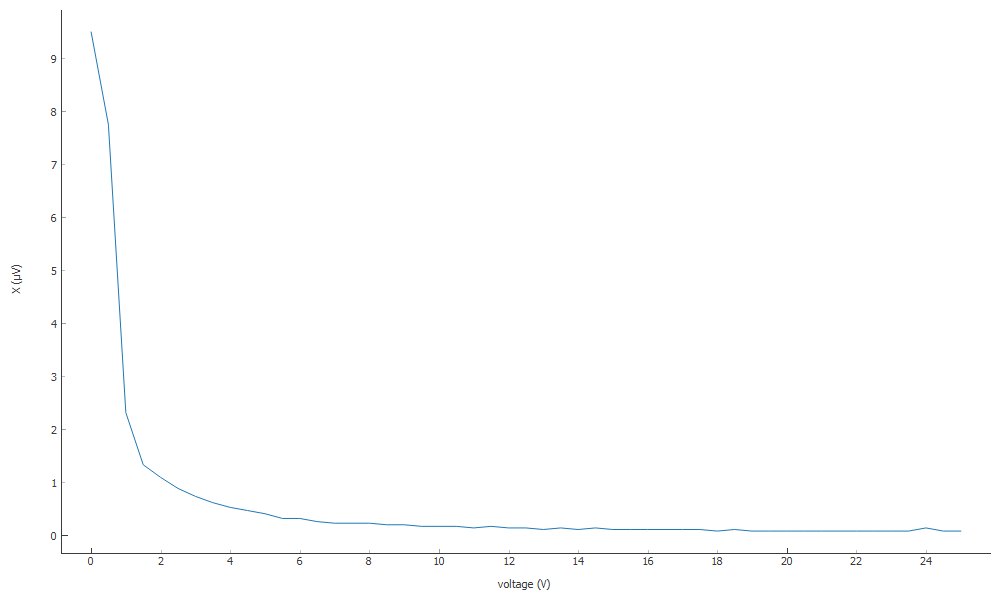

In [31]:
gvals = np.linspace(0, 25, 51)
data4, plot4 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts9-10_positive_gate')
k2200.voltage(0)
plot4[0]

Started at 2019-09-30 12:30:25
DataSet:
   location = 'data/2019-09-30/#006_2K_Contacts4-3_positive_gate_12-30-24'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (61,)
   Measured | lockin1_X         | X            | (61,)
   Measured | lockin1_Y         | Y            | (61,)
Finished at 2019-09-30 12:32:08


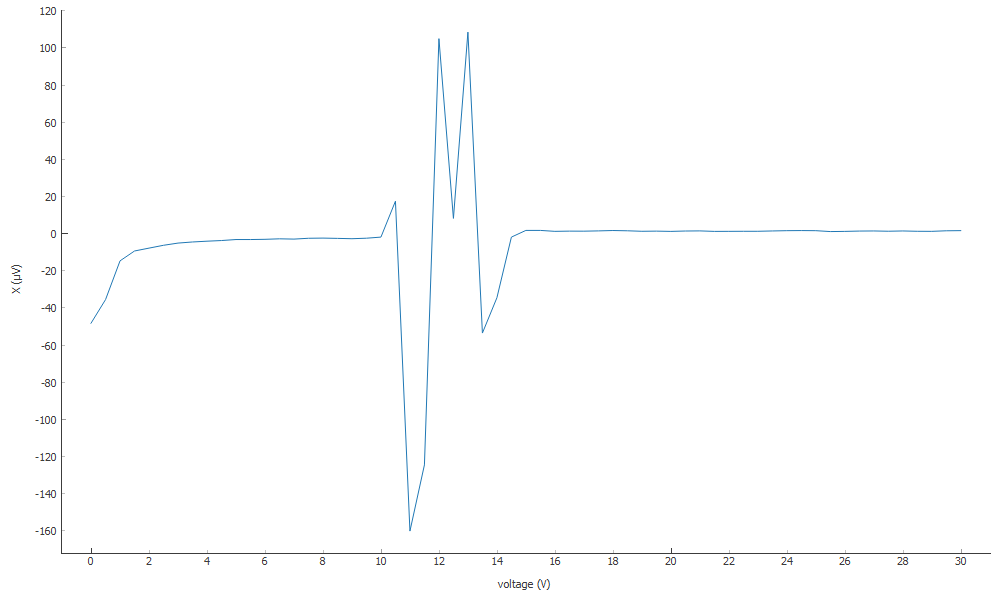

In [32]:
gvals = np.linspace(0, , 61)
data5, plot5 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts4-3_positive_gate')
k2200.voltage(0)
plot5[0]

Started at 2019-09-30 12:37:59
DataSet:
   location = 'data/2019-09-30/#007_2K_Contacts4-12_negative_gate_12-37-58'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (71,)
   Measured | lockin1_X         | X            | (71,)
   Measured | lockin1_Y         | Y            | (71,)
Finished at 2019-09-30 12:39:59


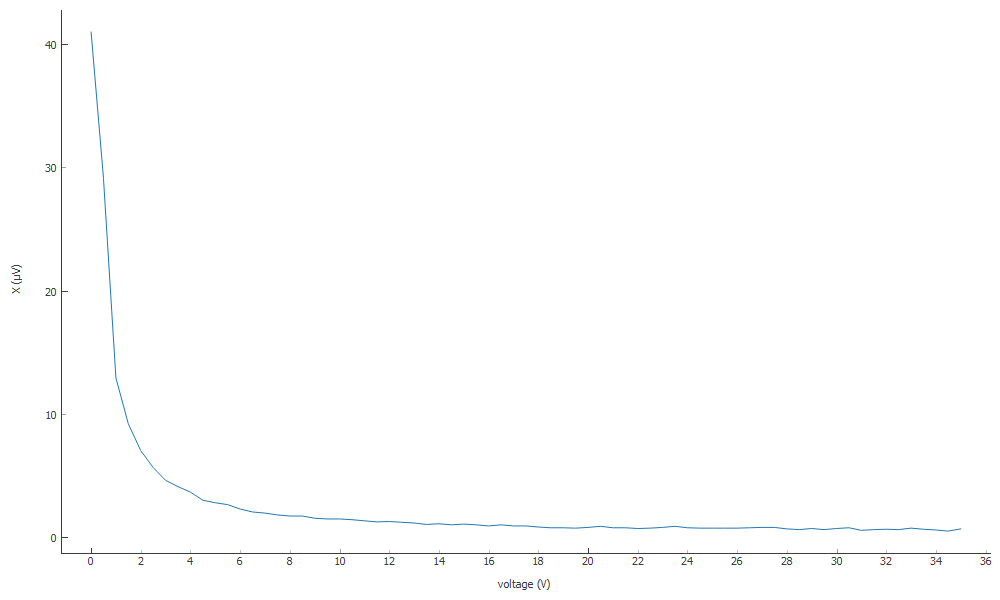

In [33]:
gvals = np.linspace(0, 35, 71)
data6, plot6 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts4-12_negative_gate')
k2200.voltage(0)
plot6[0]

Started at 2019-09-30 12:41:55
DataSet:
   location = 'data/2019-09-30/#008_2K_Contacts7-10_negative_gate_12-41-54'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (71,)
   Measured | lockin1_X         | X            | (71,)
   Measured | lockin1_Y         | Y            | (71,)
Finished at 2019-09-30 12:43:55


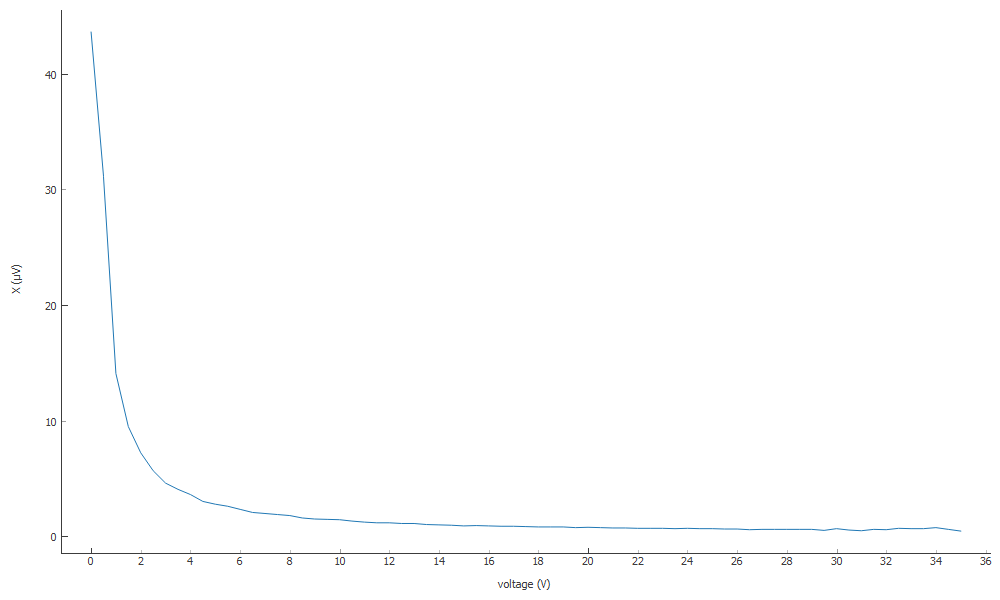

In [34]:
gvals = np.linspace(0, 35, 71)
data7, plot7 = npd.single_param_sweep(k2200.voltage, gvals, 1, lockin1.X, lockin1.Y, DataName='2K_Contacts7-10_negative_gate')
k2200.voltage(0)
plot7[0]

Lockin1 connected to contacts 4-3, lockin2 connected to contacts 7-8

In [11]:
gvals = np.linspace(10, 0, 101)  # positive gate voltage (electron side)
fieldvals = np.linspace(0, 9000, 46)
data8, plot8 = npd.twod_param_sweep(ppms.field_set_stable, fieldvals, k2200.voltage, gvals, lockin1.X, lockin1.Y, lockin2.X, SetDelay1=3, SetDelay2=2, DataName='1p8K_contacts3-4,contacts7-8_twod_positivegate')

Started at 2019-09-30 15:51:18
DataSet:
   location = 'data/2019-09-30/#010_1p8K_contacts3-4,contacts7-8_twod_positivegate_15-51-10'
   <Type>   | <array_id>                | <array.name>     | <array.shape>
   Setpoint | ppms_field_set_stable_set | field_set_stable | (46,)
   Setpoint | k2200_voltage_set         | voltage          | (46, 101)
   Measured | lockin1_X                 | X                | (46, 101)
   Measured | lockin1_Y                 | Y                | (46, 101)
   Measured | lockin2_X                 | X                | (46, 101)
Finished at 2019-09-30 19:03:10


In [50]:
np.max(data8.lockin1_X[:,:])

0.000123025

<IPython.core.display.Javascript object>


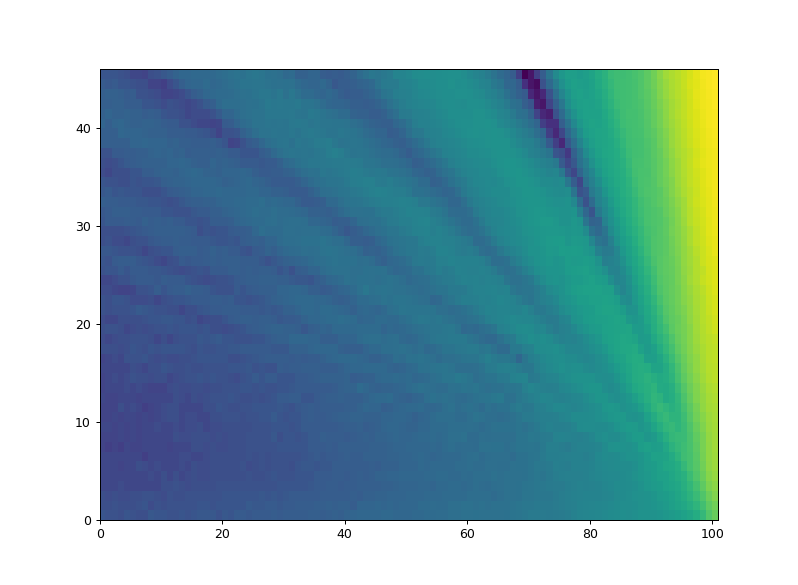

In [44]:
%matplotlib notebook
from matplotlib.colors import SymLogNorm 
plt.pcolormesh(data8.lockin2_X[:]/1e-9,norm=SymLogNorm(300))

In [51]:
gvals = np.linspace(10, 0, 201)
data9, plot9 = npd.single_param_sweep(k2200.voltage, gvals, 1.5, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='1nA_1p8K_9T')

Started at 2019-09-30 19:27:53
DataSet:
   location = 'data/2019-09-30/#011_1nA_1p8K_9T_19-27-52'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (201,)
   Measured | lockin1_X         | X            | (201,)
   Measured | lockin1_Y         | Y            | (201,)
   Measured | lockin2_X         | X            | (201,)
   Measured | lockin2_Y         | Y            | (201,)
Finished at 2019-09-30 19:33:36


In [62]:
# try one with 5 nA instead of 1 nA excitation
lockin1.amplitude(5)

In [63]:
gvals = np.linspace(10, 0, 201)
data10, plot10 = npd.single_param_sweep(k2200.voltage, gvals, 1.5, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='5nA_1p8K_9T')

Started at 2019-09-30 19:37:24
DataSet:
   location = 'data/2019-09-30/#012_5nA_1p8K_9T_19-37-22'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (201,)
   Measured | lockin1_X         | X            | (201,)
   Measured | lockin1_Y         | Y            | (201,)
   Measured | lockin2_X         | X            | (201,)
   Measured | lockin2_Y         | Y            | (201,)
Finished at 2019-09-30 19:43:10


<IPython.core.display.Javascript object>


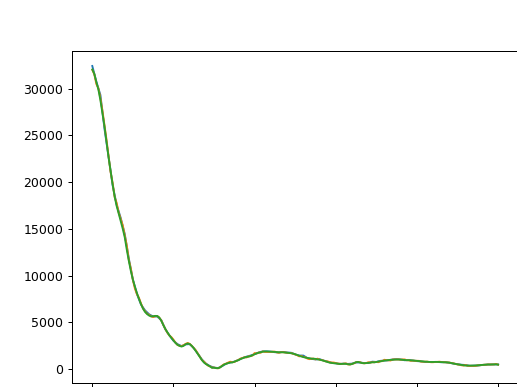

In [74]:
plt.figure()
plt.plot(data8.k2200_voltage_set[0, :], data8.lockin2_X[-1, :]/1e-9)
plt.plot(data9.k2200_voltage_set, data9.lockin2_X[:]/1e-9)
plt.plot(data10.k2200_voltage_set, data10.lockin2_X[:]/5e-9)

Now switching the polarity of the gate

In [66]:
gvals = np.linspace(10, 0, 101)
data11, plot11 = npd.single_param_sweep(k2200.voltage, gvals, 2, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='5nA_1p8K_9T_negativegate')

Started at 2019-09-30 19:47:46
DataSet:
   location = 'data/2019-09-30/#013_5nA_1p8K_9T_negativegate_19-47-44'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
   Measured | lockin2_X         | X            | (101,)
   Measured | lockin2_Y         | Y            | (101,)
Finished at 2019-09-30 19:51:49


<IPython.core.display.Javascript object>


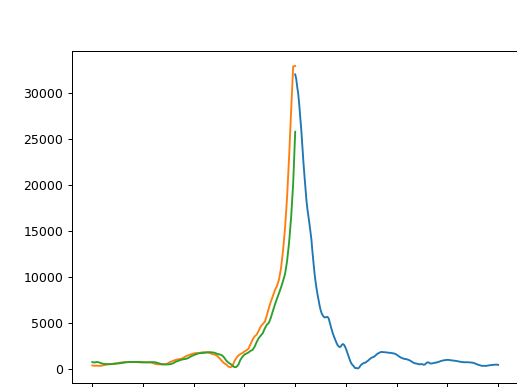

In [76]:
plt.figure()
plt.plot(data10.k2200_voltage_set[:], data10.lockin2_X[:]/5e-9)
plt.plot(-1*data11.k2200_voltage_set[:], data11.lockin2_X[:]/5e-9)
plt.plot(-1*data12.k2200_voltage_set[:], data12.lockin2_X[:]/50e-9)

In [75]:
gvals = np.linspace(10, 0, 101)
data12, plot12 = npd.single_param_sweep(k2200.voltage, gvals, 2, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='50nA_1p8K_9T_negativegate')

Started at 2019-09-30 19:56:39
DataSet:
   location = 'data/2019-09-30/#014_50nA_1p8K_9T_negativegate_19-56-37'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (101,)
   Measured | lockin1_X         | X            | (101,)
   Measured | lockin1_Y         | Y            | (101,)
   Measured | lockin2_X         | X            | (101,)
   Measured | lockin2_Y         | Y            | (101,)
Finished at 2019-09-30 20:00:45


Back down to 10 nA

In [77]:
gvals = np.linspace(10, 0, 101)  # positive gate voltage (hole side)
fieldvals = np.linspace(9000, 0, 91)
data13, plot13 = npd.twod_param_sweep(ppms.field_set_stable, fieldvals, k2200.voltage, gvals, lockin1.X, lockin1.Y, lockin2.X, SetDelay1=3, SetDelay2=2, DataName='1p8K_contacts3-4,contacts7-8_twod_negativegate')

Started at 2019-09-30 20:03:15
DataSet:
   location = 'data/2019-09-30/#015_1p8K_contacts3-4,contacts7-8_twod_negativegate_20-03-11'
   <Type>   | <array_id>                | <array.name>     | <array.shape>
   Setpoint | ppms_field_set_stable_set | field_set_stable | (91,)
   Setpoint | k2200_voltage_set         | voltage          | (91, 101)
   Measured | lockin1_X                 | X                | (91, 101)
   Measured | lockin1_Y                 | Y                | (91, 101)
   Measured | lockin2_X                 | X                | (91, 101)
Finished at 2019-10-01 02:11:11


In [78]:
ppms.temperature_rate = 2

In [79]:
Tvals = np.linspace(1.75, 10, 34)
gvals = np.linspace(2, 0, 21)
data14, plot14 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals, k2200.voltage, gvals, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, SetDelay1=0, SetDelay2=2, DataName='1p75to10K_negativegate', ZParam=[lockin1.X, lockin2.X])

Started at 2019-10-01 02:11:13
DataSet:
   location = 'data/2019-10-01/#001_1p75to10K_negativegate_02-11-11'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (34,)
   Setpoint | k2200_voltage_set               | voltage                | (34, 21)
   Measured | lockin1_X                       | X                      | (34, 21)
   Measured | lockin1_Y                       | Y                      | (34, 21)
   Measured | lockin2_X                       | X                      | (34, 21)
   Measured | lockin2_Y                       | Y                      | (34, 21)
Finished at 2019-10-01 03:21:36


In [80]:
ppms.temperature_rate = 5

In [ ]:
Tvals2 = np.linspace(11, 200, 190)
data15, plot15 = npd.twod_param_sweep(ppms.temperature_set_stable, Tvals2, k2200.voltage, gvals, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, SetDelay1=0, SetDelay2=2, DataName='11to200K_negativegate', ZParam=[lockin1.X, lockin2.X])

Started at 2019-10-01 03:21:37
Temperature timeout
Temperature timeout
Temperature timeout
Temperature timeout
Temperature timeout
Temperature timeout


Stopping since the large negative value gates are showing something more insulating. Try some gate sweeps at these higher temps. Then try a smaller fan diagram at higher gate voltages

In [7]:
data15 = qc.load_data('data/2019-10-01/#002_11to200K_negativegate_03-21-36')

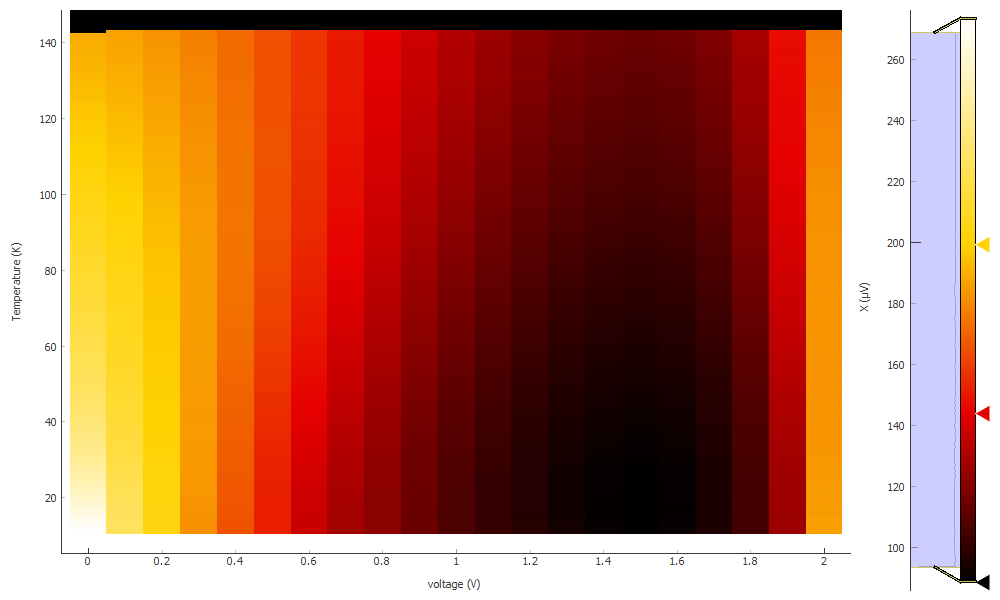

In [8]:
qc.QtPlot(data15.lockin1_X)

In [5]:
ppms.temperature()

144.01031494140625

In [10]:
ppms.temperature(100)

In [43]:
data15.ppms_temperature_set_stable_set[:-56]

array([ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143.,  nan])

In [45]:
data15

DataSet:
   location = 'data/2019-10-01/#002_11to200K_negativegate_03-21-36'
   <Type>   | <array_id>                      | <array.name>           | <array.shape>
   Setpoint | ppms_temperature_set_stable_set | temperature_set_stable | (190,)
   Setpoint | k2200_voltage_set               | voltage                | (190, 21)
   Measured | lockin1_X                       | X                      | (190, 21)
   Measured | lockin1_Y                       | Y                      | (190, 21)
   Measured | lockin2_X                       | X                      | (190, 21)
   Measured | lockin2_Y                       | Y                      | (190, 21)

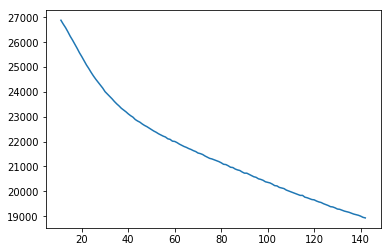

In [39]:
plt.figure()
plt.plot(data15.ppms_temperature_set_stable_set[:-58], data15.lockin1_X[:-58, -1]/10e-9)

In [44]:
k2200.voltage(17)

In [46]:
gvals = np.linspace(17, 0, 171)
data16, plot16 = npd.single_param_sweep(k2200.voltage, gvals, 2, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='10nA_100K_0T_negativegate')

Started at 2019-10-01 08:47:12
DataSet:
   location = 'data/2019-10-01/#003_10nA_100K_0T_negativegate_08-47-10'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (171,)
   Measured | lockin1_X         | X            | (171,)
   Measured | lockin1_Y         | Y            | (171,)
   Measured | lockin2_X         | X            | (171,)
   Measured | lockin2_Y         | Y            | (171,)
Finished at 2019-10-01 08:53:52


In [47]:
k2200.voltage(22)
time.sleep(15)
gvals = np.linspace(22, 0, 221)
data17, plot17 = npd.single_param_sweep(k2200.voltage, gvals, 2, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='10nA_100K_0T_negativegate')

Started at 2019-10-01 08:54:38
DataSet:
   location = 'data/2019-10-01/#004_10nA_100K_0T_negativegate_08-54-36'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (221,)
   Measured | lockin1_X         | X            | (221,)
   Measured | lockin1_Y         | Y            | (221,)
   Measured | lockin2_X         | X            | (221,)
   Measured | lockin2_Y         | Y            | (221,)
Finished at 2019-10-01 09:02:54


In [48]:
gvals = np.linspace(22, 0, 221) # Trying the fast sweep to 22V
data18, plot18 = npd.single_param_sweep(k2200.voltage, gvals, 2, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, DataName='10nA_100K_0T_negativegate')

Started at 2019-10-01 09:03:15
DataSet:
   location = 'data/2019-10-01/#005_10nA_100K_0T_negativegate_09-03-13'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | k2200_voltage_set | voltage      | (221,)
   Measured | lockin1_X         | X            | (221,)
   Measured | lockin1_Y         | Y            | (221,)
   Measured | lockin2_X         | X            | (221,)
   Measured | lockin2_Y         | Y            | (221,)
Finished at 2019-10-01 09:12:01


Nevermind. It was just the result of going straight to the highest gate, and it was helped because 2V is close enough to the very large charge neutrality point.

In [52]:
k2200.voltage()

5.43594e-05

In [53]:
ppms.temperature_rate = 5

In [55]:
ppms.temperature(300)
data19, plot19 = npd.data_log(1, ppms.temperature, lockin1.X, lockin1.Y, lockin2.X, lockin2.Y, minutes=60, DataName='0Vbg_100to300K', XParam=ppms.temperature, YParam=[lockin1.X, lockin2.X])

Started at 2019-10-01 09:15:02
DataSet:
   location = 'data/2019-10-01/#006_0Vbg_100to300K_09-15-00'
   <Type>   | <array_id>       | <array.name> | <array.shape>
   Setpoint | count_set        | count        | (3600,)
   Measured | time0            | time0        | (3600,)
   Measured | ppms_temperature | temperature  | (3600,)
   Measured | lockin1_X        | X            | (3600,)
   Measured | lockin1_Y        | Y            | (3600,)
   Measured | lockin2_X        | X            | (3600,)
   Measured | lockin2_Y        | Y            | (3600,)
Finished at 2019-10-01 10:21:10
